In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [22]:
df = pd.read_csv('apple_quality.csv')
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [24]:
df.drop(columns=['Acidity','A_id'],inplace=True)

In [25]:
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,good
...,...,...,...,...,...,...,...
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,good
3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,good


In [26]:
df.shape

(4001, 7)

In [27]:
df.dropna(inplace=True)

In [28]:
LB = LabelEncoder()
df['Quality'] = LB.fit_transform(df['Quality'])

In [29]:
df.corr()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Quality
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,-0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.264315
Quality,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,1.000000


<Axes: >

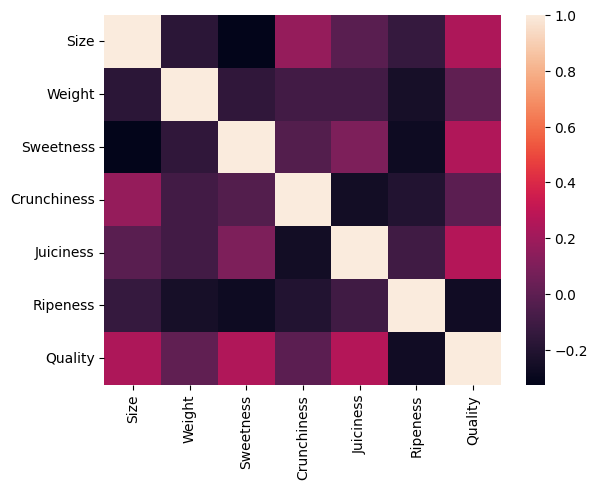

In [30]:
sns.heatmap(df.corr())

In [31]:
X =df.drop(columns = ['Quality'])
Y = df['Quality']

In [32]:
X

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849
...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488


In [33]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
3995    0
3996    1
3997    0
3998    1
3999    1
Name: Quality, Length: 4000, dtype: int32

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1)

In [35]:
model_log = LogisticRegression()
model_log.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
model_log.predict(X_test)